In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задача 29 
Предложить способы визуализации наборов четырехмерных векторов, например для Fisher's iris data

Загрузим датасет из файла.

# Задача 2

In [2]:
iris = pd.read_csv("Iris.csv")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Text(0.5,1,'scatter')

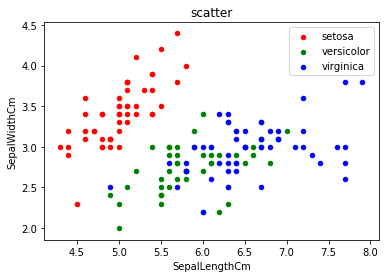

In [3]:
# scatter plot using pandas

ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Использую библиотеку `seaborn`.Нарисуем всевозможные парные графики признаков (благо их не много) и посмотрим как они характеризуют объекты выборки. По дефолту по диагонали будут рисоваться гистограммы.

In [4]:
a = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]

In [5]:
a

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


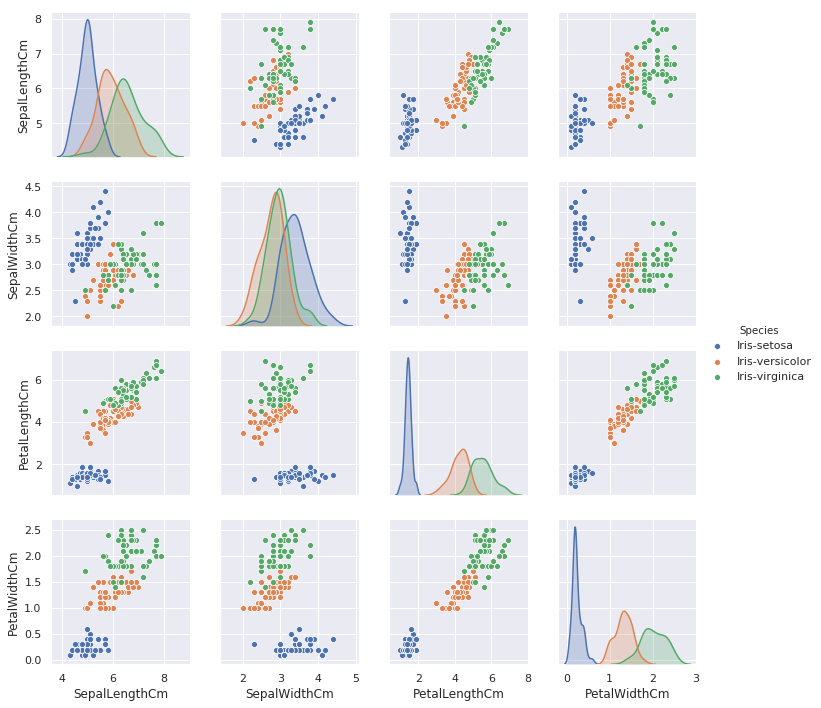

In [6]:
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde")

Как видно из графиков поля `PetalLengthCm` и `PetalWidthCm` очень хорошо отделяют класс `Iris-setosa` и вообщем хорошо описывают распределение по классам.

In [7]:
iris = iris.drop('Id', axis=1)

Попробуем разные модельки!

In [8]:
X, y = iris.drop('Species', axis=1), iris['Species']
print('X shape: {}, y shape: {}'.format(X.shape, y.shape))

X shape: (150, 4), y shape: (150,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape: {}, X_test shape: {}'.format(X_train.shape, X_test.shape))

X_train shape: (120, 4), X_test shape: (30, 4)


`k ближайших соседей`

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train, y_train)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(X_train, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test, y_test)))

The accuracy of the Knn classifier on training data is 0.97
The accuracy of the Knn classifier on test data is 0.97


`SVC`

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, y_test)))

The accuracy of the SVM classifier on training data is 0.97
The accuracy of the SVM classifier on test data is 1.00


# Задача 3

Построим график зависимости значения ошибки от объема выборки на обучении и контроле.

In [38]:
train_size = []
train_accuracy = []
test_accuracy = []
for size in np.arange(0.1, 1, 0.05):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)

    knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
    knn.fit(X_train, y_train)

    train_size.append(X_train.shape[0])
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

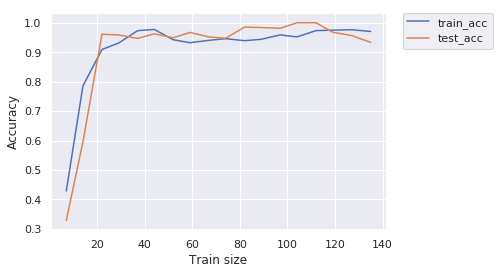

In [39]:
plt.plot(train_size, train_accuracy, label='train_acc')
plt.plot(train_size, test_accuracy, label='test_acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.show()